# Physics 256
## Curve Fitting via Least Squares Minimization

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width=600px>

## Last Time

- Definition of fitting residuals and $\chi^2$
- Derived optimal values for linear regression


## Today

- Making things look linear
- Non-linear regression
- Goodness of fit

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Mapping non-linear problems onto linear ones 

Last time we derived the formulae for $a_0$ and $a_1$ corresponding to a linear fitting function:

\begin{equation}
Y(x;\vec{a}) = a_0 + a_1 x .
\end{equation}

While today we will learn how to perform fits to general functions, there are many seemingly non-linear cases that can be mapped to linear ones with an appropriate choice of variables.

### 1. Exponentials: $Y(x;\vec{a}) = a_0 \mathrm{e}^{a_1 x}$

Define: 
\begin{equation}
\tilde{Y}(x;\vec{\tilde{a}}) = \ln Y
\end{equation}
we can write:
\begin{equation}
\tilde{Y}(x;\vec{\tilde{a}}) = \tilde{a}_0 + \tilde{a}_1 x
\end{equation}
where
\begin{align}
\tilde{a}_0 &= \ln a_0 \newline
\tilde{a}_1 &= a_1.
\end{align}

### 2. Powerlaws: $Y(x;\vec{a}) = a_0 x^{a_1}$

Define:
\begin{equation}
\tilde{Y}(x;\vec{\tilde{a}}) = \ln Y
\end{equation}
we can write:
\begin{equation}
\tilde{Y}(\tilde{x};\vec{\tilde{a}}) = \tilde{a}_0 + \tilde{a}_1 \tilde{x}
\end{equation}
where
\begin{align}
\tilde{x} &= \ln x \newline
\tilde{a}_0 &= \ln a_0 \newline
\tilde{a}_1 &= a_1.
\end{align}

<br />
<div class="span alert-danger">
Note that in both cases, we may have to shift our data to make it go through the origin.
</div>

## Example:

<!--
np.array([[cx,2.4*np.exp(-1.7*cx) + np.random.normal(0,0.005),0.2*cx**1.2 + np.random.normal(0,0.05)] for cx in np.linspace(0.1,5,20)])
-->

In [64]:
# We defined these functions last time
def Σ(σ,q):
    '''Compute the Σ function needed for linear fits.'''
    return np.sum(q/σ**2)

def get_a(x,y,σ):
    '''Get the χ^2 best fit value of a0 and a1.'''

    # Get the individual Σ values
    Σy,Σx,Σx2,Σ1,Σxy = Σ(σ,y),Σ(σ,x),Σ(σ,x**2),Σ(σ,np.ones(x.size)),Σ(σ,x*y)

    # the denominator
    D = Σ1*Σx2 - Σx**2

    # compute the best fit coefficients
    a = np.array([Σy*Σx2 - Σx*Σxy,Σ1*Σxy - Σx*Σy])/D

    # Compute the error in a
    aErr = np.array([np.sqrt(Σx2/D),np.sqrt(Σ1/D)])

    return a,aErr

def linear(x,a):
    '''Return a polynomial of order'''
    return a[0] + a[1]*x

data = np.array([[  1.00000000e-01,   2.01892692e+00,   1.58348915e-02],
       [  3.57894737e-01,   1.31376543e+00,   6.06001004e-02],
       [  6.15789474e-01,   8.36947495e-01,   1.35916916e-01],
       [  8.73684211e-01,   5.42355156e-01,   1.76035996e-01],
       [  1.13157895e+00,   3.49893861e-01,   2.43323465e-01],
       [  1.38947368e+00,   2.36538683e-01,   2.42827504e-01],
       [  1.64736842e+00,   1.43674029e-01,   3.74817269e-01],
       [  1.90526316e+00,   9.85488051e-02,   4.86322104e-01],
       [  2.16315789e+00,   5.96025434e-02,   5.21411827e-01],
       [  2.42105263e+00,   3.20849317e-02,   5.59559859e-01],
       [  2.67894737e+00,   2.68929383e-02,   6.12591315e-01],
       [  2.93684211e+00,   1.38671002e-02,   6.50257932e-01],
       [  3.19473684e+00,   1.37326463e-02,   8.16448997e-01],
       [  3.45263158e+00,   9.33532141e-03,   8.92296424e-01],
       [  3.71052632e+00,   5.05978053e-03,   9.00199490e-01],
       [  3.96842105e+00,   5.02030414e-03,   1.08752004e+00],
       [  4.22631579e+00,   5.05146592e-03,   1.17355704e+00],
       [  4.48421053e+00,   7.35935757e-03,   1.13076756e+00],
       [  4.74210526e+00,   8.85727075e-04,   1.27750864e+00],
       [  5.00000000e+00,   7.75489547e-04,   1.28161068e+00]])

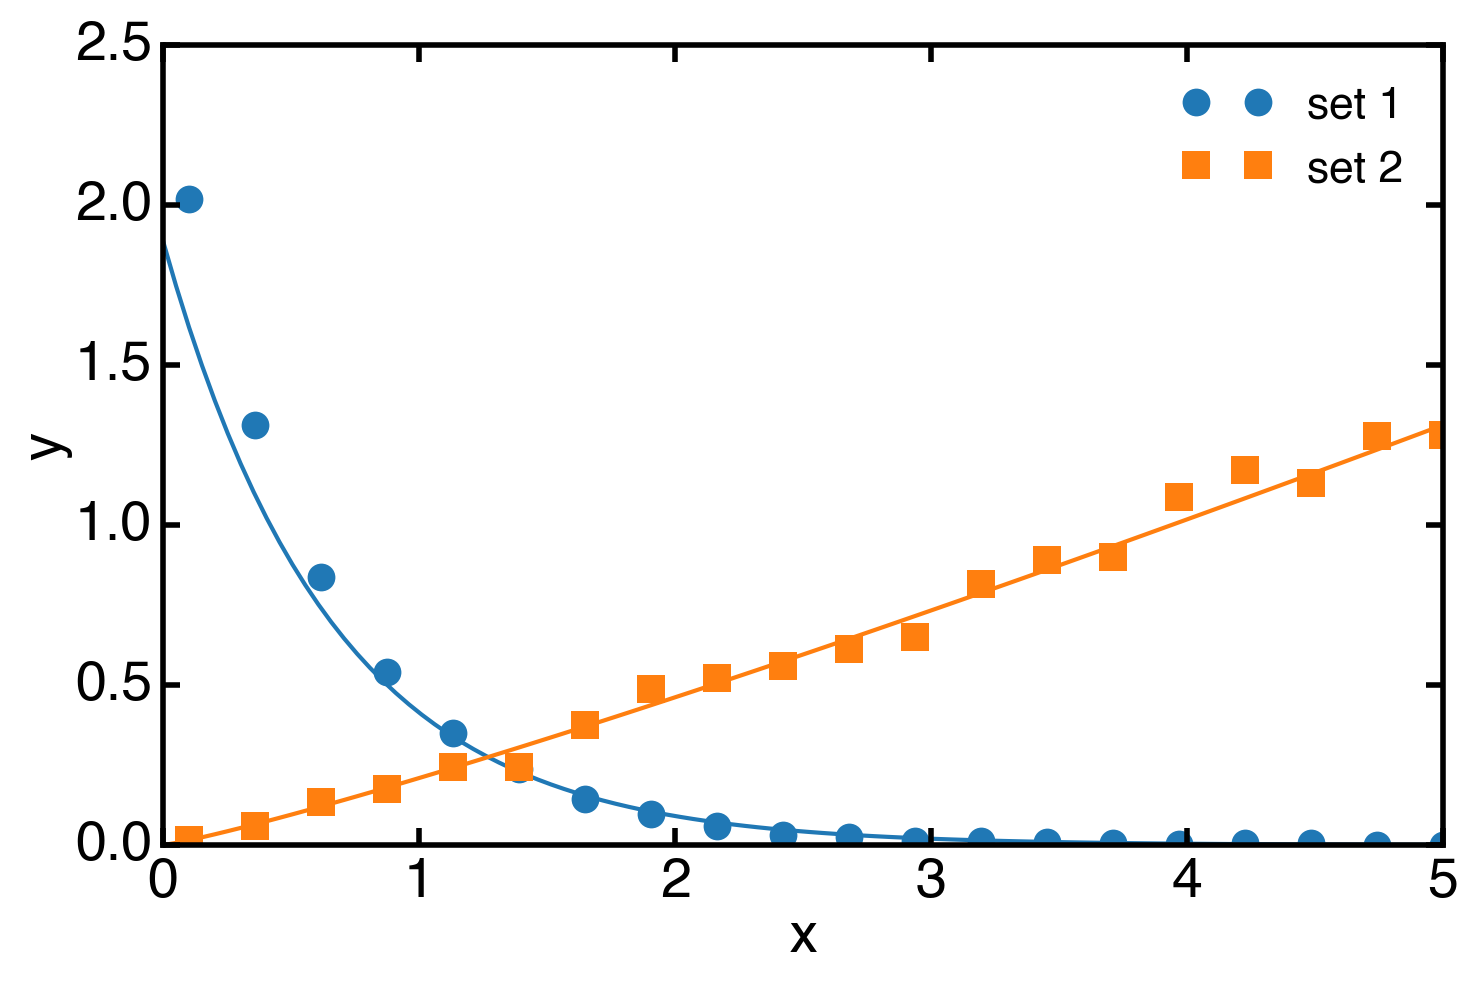

In [72]:
# get the data
x,y1,y2,σ = data[:,0],data[:,1],data[:,2],np.ones_like(data[:,0])

# plot the data
plt.plot(x,y1,'o',mfc=colors[0], mec='None',label='set 1')
plt.plot(x,y2,'s',mfc=colors[1], mec='None', label='set 2')

# peform the fits
a1,a1_err = get_a(x,np.log(y1),σ)
a2,a2_err = get_a(np.log(x),np.log(y2),σ)

# plot the fit results
fx = np.linspace(0,5,100)
plt.plot(fx,np.exp(a1[0])*np.exp(a1[1]*fx), color=colors[0], linewidth=1.5, zorder=0)
plt.plot(fx,np.exp(a2[0])*fx**a2[1], color=colors[1],linewidth=1.5, zorder=0)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<div class="span alert-danger">
You need to be careful with the correct propagation of errors in your fitting parameteters when doing this!
</div>

## General Least Squares Fitting

We can easily generalize our fitting procedure to functions of the form:

\begin{equation}
Y(x;\vec{a}) = \sum_{\alpha=0}^{M-1} a_\alpha Y_\alpha(x)
\end{equation}
where $Y_\alpha(x) : \mathbb{R} \to \mathbb{R}$.  As before, we minimize $\chi^2$ with respect to $a_\alpha$:

\begin{align}
\frac{\partial \chi^2}{\partial a_\alpha} &= \frac{\partial}{\partial a_\alpha} \sum_i \frac{1}{\sigma_i^2}\left[\sum_{\beta=0}^{M-1}a_\beta Y_\beta(x_i)  y_i\right]^2 = 0\newline
&= \sum_i \frac{Y_\alpha(x_i)}{\sigma_i^2}\left[\sum_{\beta=0}^{M-1}a_\beta Y_\beta(x_i)  y_i\right] = 0\newline
\end{align}
which gives:
\begin{equation}
\sum_i \sum_\beta \frac{Y_\alpha(x_i)Y_\beta(x_i)}{\sigma_i^2} a_\beta = \sum_i \frac{Y_\alpha(x_i)y_i}{\sigma_i^2} .
\end{equation}

At this point it is useful to define the **design matrix** $\mathsf{A}$ which is independenct of $y_i$ and only depends on where the data is measured:
\begin{equation}
\mathsf{A}_{i\alpha} \equiv \frac{Y_\alpha(x_i)}{\sigma_i}.
\end{equation}

We can re-write our optimization equation as:
\begin{equation}
\sum_i \sum_\beta \mathsf{A}_{i\alpha}\mathsf{A}_{i\beta} a_\beta = \sum_i \mathsf{A}_{i\alpha}\frac{y_i}{\sigma_i}
\end{equation}
which is much simpler using matrix multiplication:
\begin{equation}
\left(\mathsf{A}^\intercal \mathsf{A}\right) \vec{a} = \mathsf{A}^\intercal \vec{b}
\end{equation}
where $b_i \equiv y_i/\sigma_i$. This equation can be easily solved:

\begin{equation}
\vec{a} =\left(\mathsf{A}^\intercal \mathsf{A}\right)^{-1} \mathsf{A}^\intercal \vec{b}
\end{equation}
where the uncertainty in the fitting parameters are given by the covariance matrix:
\begin{align}
\sigma_{a_{\alpha}} &= \sqrt{\mathsf{C}_{\alpha\alpha}} \newline
\mathsf{C} &= \left(\mathsf{A}^\intercal \mathsf{A}\right)^{-1} .
\end{align}

This is how *all* black-box least squares fitting functions work.

In [79]:
print(y1)

[  2.01892692e+00   1.31376543e+00   8.36947495e-01   5.42355156e-01
   3.49893861e-01   2.36538683e-01   1.43674029e-01   9.85488051e-02
   5.96025434e-02   3.20849317e-02   2.68929383e-02   1.38671002e-02
   1.37326463e-02   9.33532141e-03   5.05978053e-03   5.02030414e-03
   5.05146592e-03   7.35935757e-03   8.85727075e-04   7.75489547e-04]


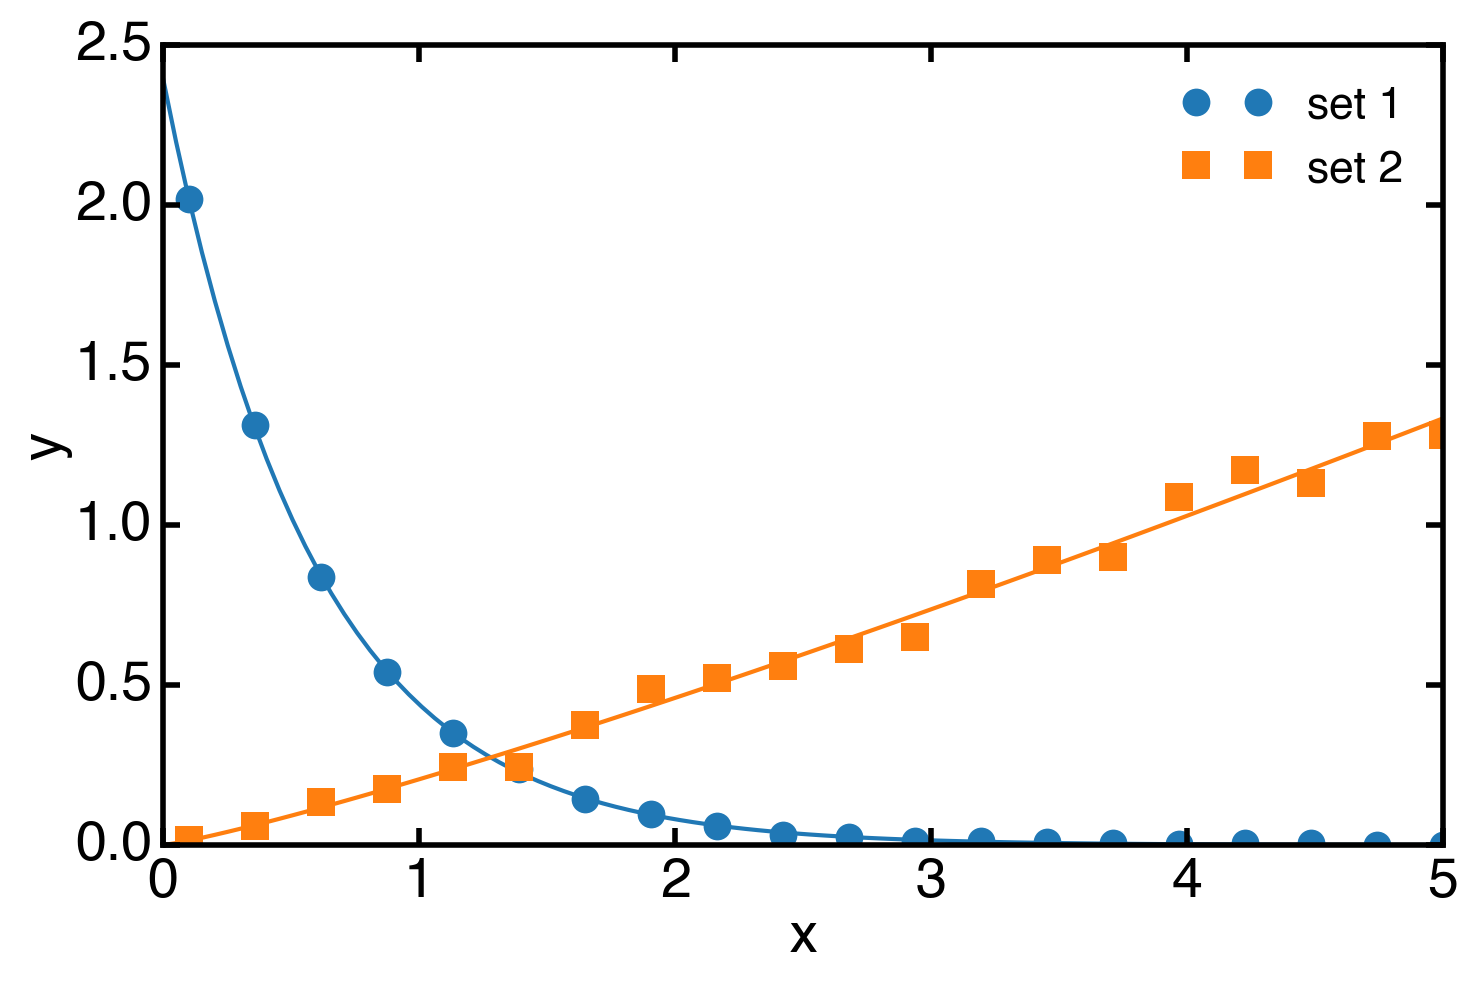

In [86]:
from scipy.optimize import curve_fit

def exp_func(x,*a):
    return a[0]*np.exp(a[1]*x)

def power_func(x,*a):
    return a[0]*x**a[1]

# perform the fits
a1,a1_cov = curve_fit(exp_func,x,y1,p0=(1,1))
a2,a2_cov = curve_fit(power_func,x,y2,p0=(1,1))

# plot the data
plt.plot(x,y1,'o',mfc=colors[0], mec='None',label='set 1')
plt.plot(x,y2,'s',mfc=colors[1], mec='None', label='set 2')

# plot the fit results
fx = np.linspace(0,5,100)
plt.plot(fx,exp_func(fx,*a1), color=colors[0], linewidth=1.5, zorder=0)
plt.plot(fx,power_func(fx,*a2), color=colors[1],linewidth=1.5, zorder=0)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<div class="span alert alert-success">
<h2> Group Programming challenge </h2>
Load the experimental data for the temperature T along a metal rod of length 10 cm
suspended between two constant temperature baths in file  `rod_temperature.dat`. Perform a linear fit to the data and display the resulting fit function and parameters in the legend.
</div>